In [2]:
import numpy as np

a = np.arange(15)

In [3]:
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [4]:
b  = np.reshape(a, (3, 5))

In [5]:
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [6]:

b.sum(axis=1)

array([10, 35, 60])

## create random number

In [7]:
rng = np.random.default_rng()

In [8]:
rng.random()

0.007230798630922575

## generate random int list

In [9]:
lst = np.random.randint(low=0, high=10, size=5)

In [10]:
lst

array([1, 3, 8, 8, 9])

In [11]:
order = np.argsort(lst)
order

array([0, 1, 2, 3, 4])

In [12]:
order = order[:3]
order

array([0, 1, 2])

In [13]:
np.take_along_axis(np.arange(2, 15), order, axis=0)

array([2, 3, 4])

In [14]:
lst = np.array([2, 2, 1, 1, 3])
unique, counts = np.unique(lst, return_counts=True)
print(unique)
print(counts)
predict = np.argmax(counts)
print(unique[predict])

[1 2 3]
[2 2 1]
1


In [15]:
a = np.arange(15).reshape(3, 5)
b = np.arange(10).reshape(2, 5)

In [16]:
a @ b.T

array([[ 30,  80],
       [ 80, 255],
       [130, 430]])

In [17]:
a = np.arange(2).reshape(2, 1)
b = np.arange(3)
c = np.arange(6).reshape(2, 3)

In [18]:
c -a -b

array([[0, 0, 0],
       [2, 2, 2]])

In [19]:
lst = ['a', 'b', 'c']
for test_index, test in enumerate(lst):
    train = lst
    train.pop(test_index)
    print(train)
    print(test_index)


['b', 'c']
0
['b']
1


## np.nditer

In [20]:
def iter_add(x, y, out=None):
    """use np.nditer to add two vector

    Args:
        x (np.ndarray): input array
        y (np.ndarray): input array
        out (np.ndarray, optional): output array. Defaults to None.

    Returns:
        out: x+y
    """

    it = np.nditer([x, y, out], [] , [["readonly"], ["readonly"], ["writeonly", "allocate"]])
    with it:
        for (a, b, c) in it:
            np.add(a, b, c)
        return it.operands[2]


In [21]:
iter_add(np.arange(10000000), np.arange(10000000))

array([       0,        2,        4, ..., 19999994, 19999996, 19999998])

In [22]:
np.add(np.arange(10000000), np.arange(10000000))

array([       0,        2,        4, ..., 19999994, 19999996, 19999998])

In [23]:
a = np.arange(6).reshape(2, 3)
for x in np.nditer(a):
    print(x, end=" ")

for x in np.nditer(a, order="K"):
    print(x, end=" ")

0 1 2 3 4 5 0 1 2 3 4 5 

In [24]:
a = np.arange(6).reshape(2, 3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [25]:
with np.nditer(a, op_flags=['readwrite']) as it:
    for x in it:
        x[...] = 2*x

a

array([[ 0,  2,  4],
       [ 6,  8, 10]])

[-1.         -0.99798668 -0.99195481 -0.9819287  -0.9679487  -0.95007112
 -0.92836793 -0.90292654 -0.87384938 -0.84125353 -0.80527026 -0.76604444
 -0.72373404 -0.67850941 -0.63055267 -0.58005691 -0.52722547 -0.47227107
 -0.41541501 -0.35688622 -0.29692038 -0.23575894 -0.17364818 -0.1108382
 -0.04758192  0.01586596  0.07924996  0.14231484  0.20480667  0.26647381
  0.32706796  0.38634513  0.44406661  0.5         0.55392006  0.60560969
  0.65486073  0.70147489  0.74526445  0.78605309  0.82367658  0.85798341
  0.88883545  0.91610846  0.93969262  0.95949297  0.97542979  0.98743889
  0.99547192  0.99949654  0.99949654  0.99547192  0.98743889  0.97542979
  0.95949297  0.93969262  0.91610846  0.88883545  0.85798341  0.82367658
  0.78605309  0.74526445  0.70147489  0.65486073  0.60560969  0.55392006
  0.5         0.44406661  0.38634513  0.32706796  0.26647381  0.20480667
  0.14231484  0.07924996  0.01586596 -0.04758192 -0.1108382  -0.17364818
 -0.23575894 -0.29692038 -0.35688622 -0.41541501 -0.

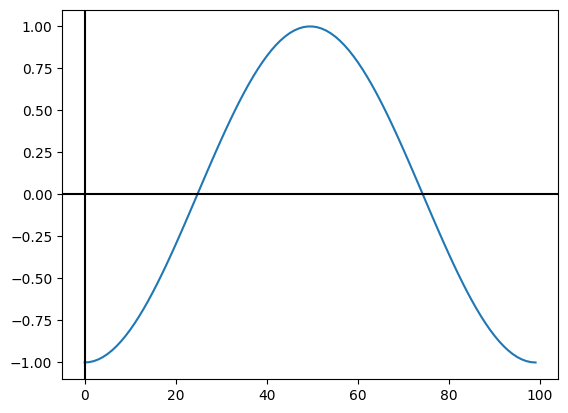

In [26]:
import numpy as np

num = 100

delta = 2 * np.pi / num
X = np.linspace(-np.pi, np.pi, num)
# fx = 1 + np.cos(X) + np.cos(2*X) + np.cos(3*X) 
fx = np.cos(X) 
print(fx)

# plot fx 

import matplotlib.pyplot as plt
# add y=0 x=0 axis to the fig

plt.plot(fx)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


In [27]:

fft_coefficicy = np.fft.fft(fx) / num

for i in range(3):
    print(f"n={i}:  {fft_coefficicy[i]}")
    print(f"n={-i}:  {fft_coefficicy[-i]}")
    print("\n")


n=0:  (-0.009999999999999995+0j)
n=0:  (-0.009999999999999995+0j)


n=1:  (-0.5021819887226786-0.015781704779778135j)
n=-1:  (-0.5021819887226786+0.015781704779778142j)


n=2:  (0.0034151808304250762+0.00021486496555724068j)
n=-2:  (0.0034151808304250762-0.00021486496555724068j)




In [28]:
def cal(n):
    a = 1
    for i in range(1,n+1):
        a *= 1+1/2**i
    
    return a


In [29]:
import numpy as np
print(1/np.e)

0.36787944117144233


In [30]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

/tmp/ipykernel_76710/318954753.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


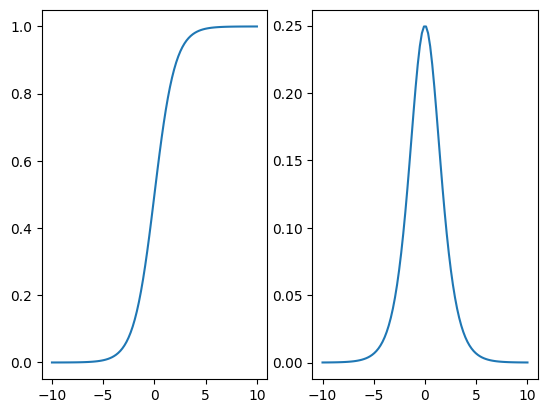

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-10, 10, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x, sigmoid(x))
ax2.plot(x, dsigmoid(x))

fig.show()

# do this for RELU



/tmp/ipykernel_76710/1654537313.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


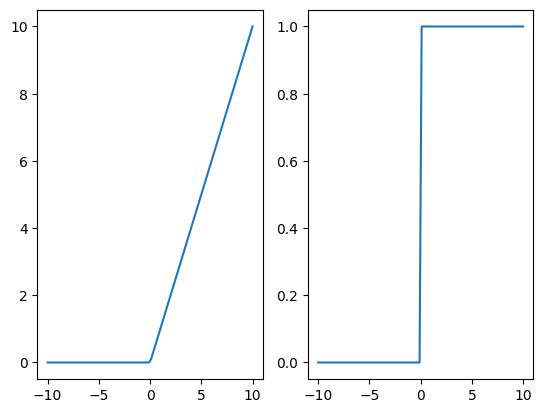

In [32]:
def relu(x):
    return np.maximum(0, x)

def drelu(x):
    return np.where(x > 0, 1, 0)


x = np.linspace(-10, 10, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)


ax1.plot(x, relu(x))

ax2.plot(x, drelu(x))

fig.show()

In [33]:
3+sigmoid(-4)

3.0179862099620918

In [34]:
sigmoid(3) + 1

1.9525741268224333

In [35]:
1/(sigmoid(3) + 1)

0.5121444488396316

In [36]:
W = np.random.randn(5, 10)
X = np.random.randn(10, 3)
D = W.dot(X)

In [37]:
D.shape

(5, 3)

In [63]:
a = np.arange(15).reshape(3,-1)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [66]:
a[!=0] = 1


SyntaxError: invalid syntax (2399507124.py, line 1)

In [65]:
a

array([[0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [73]:

rng = np.random.default_rng()
rng.choice(5, 3)

array([4, 3, 2])

In [74]:
a = np.arange(15).reshape(3, 5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [75]:
a.argmax(axis=1)

array([4, 4, 4])

In [77]:

np.logspace(np.log10(1), np.log10(2), 10)

array([1.        , 1.08005974, 1.16652904, 1.25992105, 1.36079   ,
       1.46973449, 1.58740105, 1.71448797, 1.85174942, 2.        ])